# Importando todas bibliotecas para o experimento

In [109]:
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.io as sio

# Carregando o audio

In [110]:
Fs, y_raw = sio.wavfile.read('linkin-park-numb.wav')


/tmp/ipykernel_28487/1307805652.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, y_raw = sio.wavfile.read('linkin-park-numb.wav')


### Transformando audio estereo em mono

In [111]:
print(f"formato antes de transformar: {y_raw.shape}")
y=(y_raw[:,0]+y_raw[:,1])/2
print(f"formato depois de transformar: {y.shape}")

formato antes de transformar: (1501083, 2)
formato depois de transformar: (1501083,)


### Mostrando a taxa de amostragem

In [112]:
print(f"{Fs} amostras por segundo")

44100 amostras por segundo


# Mostrando o spectro

In [113]:
def espectro(y, cor = 'tab:blue'):
    """ Rotina que exibe o espectro de magnitude (X(ejw)) de um sinal discreto """  

    #modulo da transf. de Fourier
    Y = np.abs(np.fft.fft(y))
    #frequencias avaliadas
    w = np.linspace(0,2*math.pi,Y.size)

    #exibe o grafico do espectro
    plt.figure() 
    plt.plot(w,Y, color=cor)
    plt.xlabel('$\Omega$ [rad]', fontsize=10)
    plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=10)
    plt.grid(True)
    plt.xlim((0,2*math.pi))
    plt.show()
    
    return Y,w  

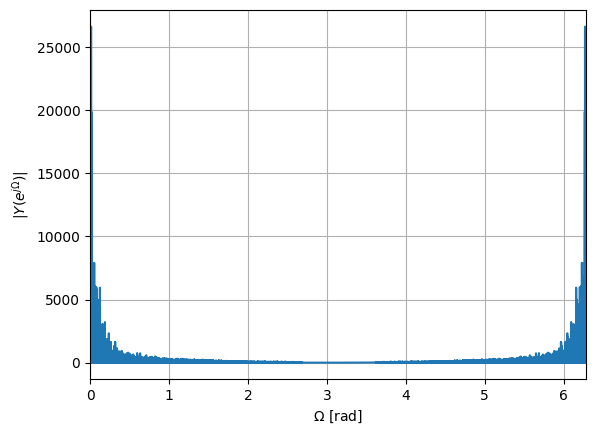

formato do espectro: (1501083,), minimo: 0.00104, maximo: 26619.07243
formato das frequencias: (1501083,), minimo: 0.0, maximo: 6.28319


In [114]:
Y,w = espectro(y)
casas = 5
print(f"formato do espectro: {Y.shape}, minimo: {round(Y.min(),casas)}, maximo: {round(Y.max(),casas)}")
print(f"formato das frequencias: {w.shape}, minimo: {round(w.min(),casas)}, maximo: {round(w.max(),casas)}")


# Reduzindo amostragem (decimação)

In [115]:
def reduzirAmostragem(y, M, Fs):
    """
    Rotina que reduz a taxa de amostragem de um sinal discreto for um fator M
    args:
        y: sinal discreto
        M: fator de reducao da taxa de amostragem
        Fs: taxa de amostragem original
    return:
        y_down: sinal discreto com taxa de amostragem reduzida
        Fs_down: taxa de amostragem reduzida
    
    o procedimento funciona da seguinte forma:
    a cada bloco de M amostras, basta reter uma amostra de y e descartar as M - 1 amostras seguintes.
    
    
    """
    y_down = y[::M]
    return y_down, Fs/M

### Mostrando a subamostragem no espectro

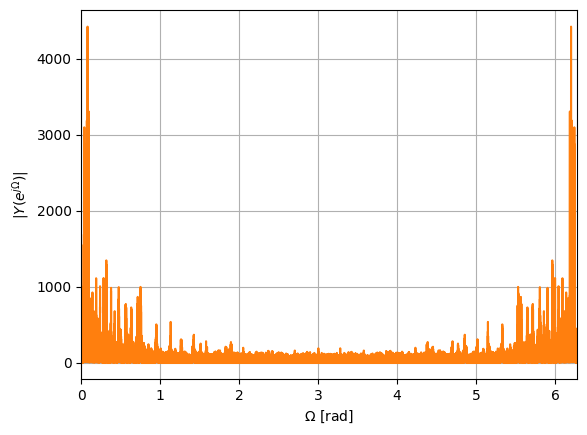

In [116]:
y_down, Fs_down = reduzirAmostragem(y, 6, Fs)
Y,w = espectro(y_down, 'tab:orange')

### Ouvindo para diversos Ms

reduzindo a taxa de amostragem por um fator 1


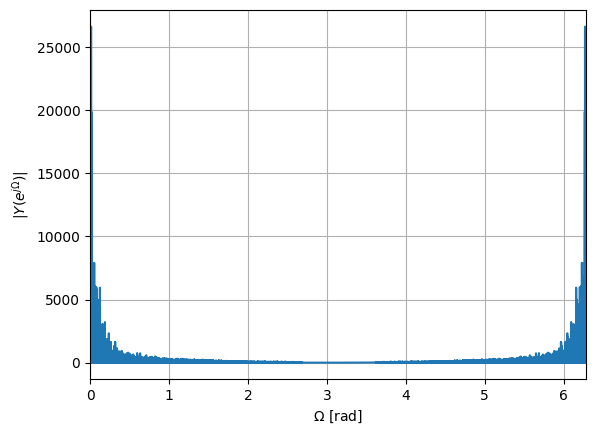

formato do espectro: (1501083,), minimo: 0.00104, maximo: 26619.07243
formato das frequencias: (1501083,), minimo: 0.0, maximo: 6.28319
reduzindo a taxa de amostragem por um fator 3


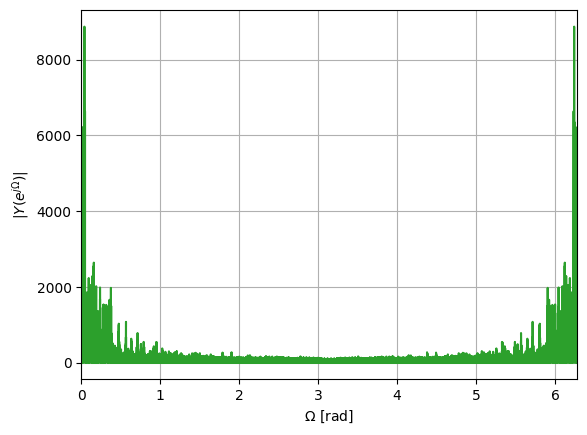

formato do espectro: (500361,), minimo: 0.03588, maximo: 8867.67257
formato das frequencias: (500361,), minimo: 0.0, maximo: 6.28319
reduzindo a taxa de amostragem por um fator 6


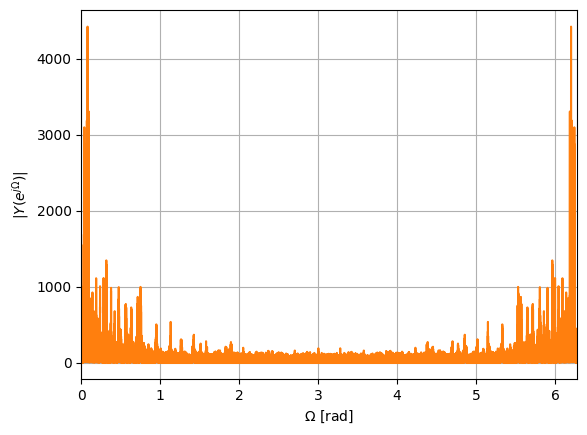

formato do espectro: (250181,), minimo: 0.29301, maximo: 4420.65782
formato das frequencias: (250181,), minimo: 0.0, maximo: 6.28319
reduzindo a taxa de amostragem por um fator 12


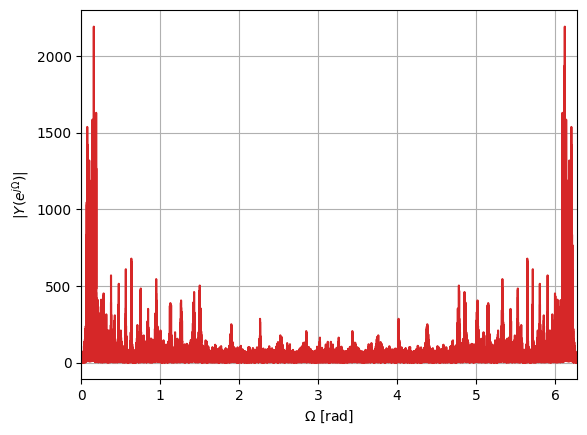

formato do espectro: (125091,), minimo: 0.16344, maximo: 2192.07607
formato das frequencias: (125091,), minimo: 0.0, maximo: 6.28319


In [117]:
Ms = [1, 3, 6, 12]
cores = ['tab:blue','tab:green','tab:orange', 'tab:red']
for i, M in enumerate(Ms):
    print(f"reduzindo a taxa de amostragem por um fator {M}")

    y_down, Fs_down = reduzirAmostragem(y, M, Fs)
    ipd.Audio(y_down,rate=Fs_down)
    Y,w = espectro(y_down, cores[i])
    print(f"formato do espectro: {Y.shape}, minimo: {round(Y.min(),casas)}, maximo: {round(Y.max(),casas)}")
    print(f"formato das frequencias: {w.shape}, minimo: {round(w.min(),casas)}, maximo: {round(w.max(),casas)}")